# Tải thư viện

In [43]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import datetime

In [45]:
raw_df = pd.read_csv('Data/LordsMobileVN_clean.csv')


In [46]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [47]:
reactions

{'like': 54, 'love': 4, 'haha': 1, 'shares': 2, 'comments': 4}

## Phân tích Reactions

1. Phân tích sự phát triển lượt react theo ngày

In [48]:
post_df_1=raw_df
post_df_1[['post_id', 'reactions']]

,post_id,reactions
0,752698296898984,"{'like': 54, 'love': 4, 'haha': 1}"
1,744907481011399,"{'like': 97, 'haha': 25}"
2,745522664283214,"{'like': 130, 'love': 3, 'haha': 30, 'wow': 1,..."
3,752111686957645,"{'like': 91, 'love': 2, 'haha': 6}"
4,751732603662220,"{'like': 96, 'love': 2}"
...,...,...
195,688423049993176,"{'like': 183, 'love': 2, 'haha': 44, 'wow': 2,..."
196,686334866868661,"{'like': 96, 'love': 3, 'haha': 27, 'care': 1}"
197,687518510083630,"{'like': 176, 'love': 3, 'haha': 164, 'wow': 2..."
198,687500140085467,"{'like': 132, 'love': 7, 'haha': 1}"


In [49]:
post_df_2=raw_df[['time' ,'reaction_count']]
post_df_2

,time,reaction_count
0,2023-11-14 16:29:00,59
1,2023-11-14 08:00:00,122
2,2023-11-13 16:00:00,165
3,2023-11-13 10:23:14,99
4,2023-11-13 10:00:03,98
...,...,...
195,2023-08-04 11:14:35,234
196,2023-08-04 08:00:01,127
197,2023-08-03 16:00:02,350
198,2023-08-03 08:00:01,140


In [50]:
post_df_2['time'] = pd.to_datetime(post_df_2['time'])
dates=post_df_2['time'].to_list()
y=post_df_2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

200 200
[Timestamp('2023-08-02 08:00:02'), Timestamp('2023-08-03 08:00:01'), Timestamp('2023-08-03 16:00:02'), Timestamp('2023-08-04 08:00:01'), Timestamp('2023-08-04 11:14:35'), Timestamp('2023-08-04 14:27:42'), Timestamp('2023-08-04 16:39:04'), Timestamp('2023-08-05 08:00:03'), Timestamp('2023-08-06 22:35:25'), Timestamp('2023-08-07 08:00:42'), Timestamp('2023-08-07 13:00:04'), Timestamp('2023-08-07 17:46:52'), Timestamp('2023-08-08 08:00:02'), Timestamp('2023-08-09 08:00:02'), Timestamp('2023-08-09 13:21:03'), Timestamp('2023-08-10 10:27:12'), Timestamp('2023-08-10 12:30:00'), Timestamp('2023-08-11 10:00:00'), Timestamp('2023-08-11 12:01:06'), Timestamp('2023-08-11 15:00:01'), Timestamp('2023-08-12 08:00:00'), Timestamp('2023-08-13 08:00:00'), Timestamp('2023-08-14 08:00:00'), Timestamp('2023-08-14 14:47:00'), Timestamp('2023-08-14 15:23:00'), Timestamp('2023-08-15 09:30:00'), Timestamp('2023-08-15 12:53:00'), Timestamp('2023-08-16 10:02:00'), Timestamp('2023-08-16 12:23:00'), Times

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_9864\2221346998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_2['time'] = pd.to_datetime(post_df_2['time'])


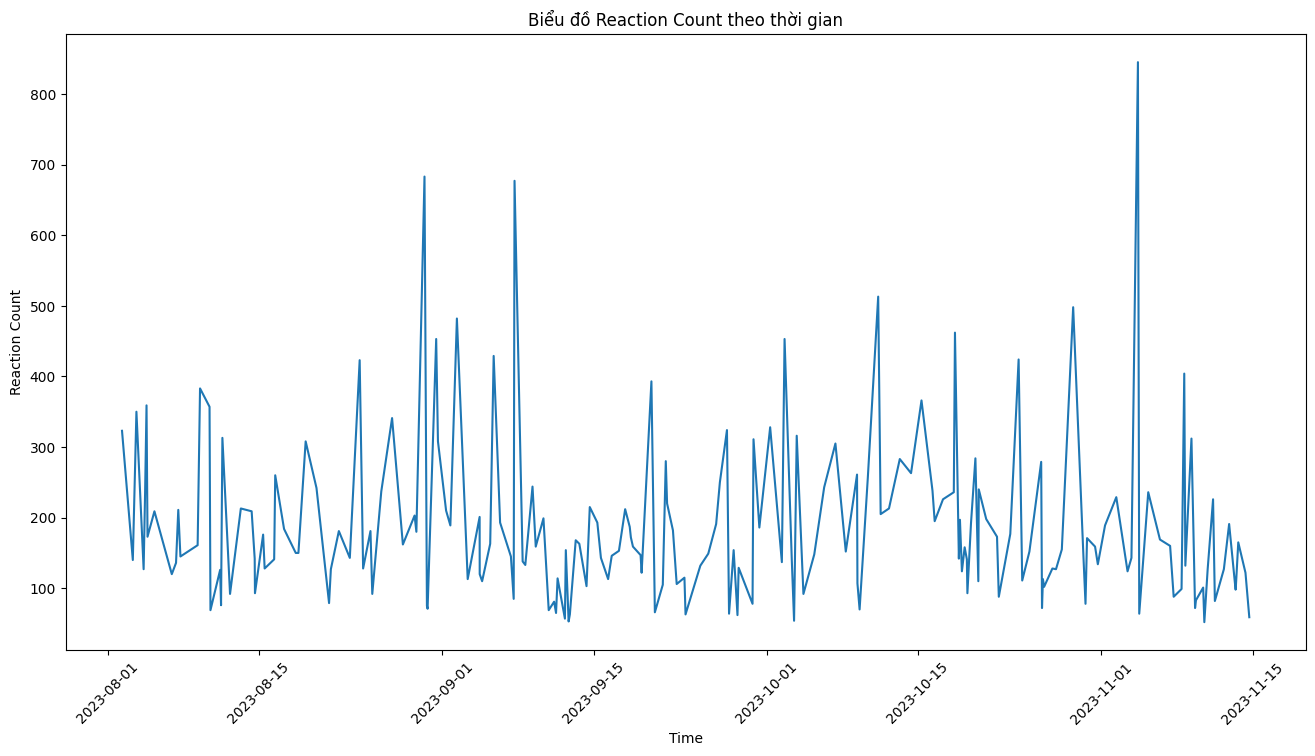

In [51]:
# biểu đồ thể hiện hiệu xuất reaction cout của các bài đăng theo thời gian
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Reaction Count')
plt.title('Biểu đồ Reaction Count theo thời gian')
plt.plot(dates,y)
plt.show()

2. Phân tích từng loại lượt reaction theo ngày

In [52]:
post_df_1['reactions'] = post_df_1['reactions'].apply(lambda x : dict(eval(x)) )
df_reactions = post_df_1['reactions'].apply(pd.Series )

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_9864\4037589999.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_reactions = post_df_1['reactions'].apply(pd.Series )


In [53]:
# gộp các cột lại vào dataframe
df_reactions = df_reactions.fillna(0)
post_df_1 = post_df_1.fillna(' ')
post_df_with_reactions = pd.concat([post_df_1, df_reactions], axis=1).drop('reactions', axis=1)
post_df_with_reactions[['post_id','post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

,post_id,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,752698296898984,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,744907481011399,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,745522664283214,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,752111686957645,,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,751732603662220,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...,...
195,688423049993176,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,686334866868661,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,687518510083630,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350
198,687500140085467,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...,132.0,7.0,1.0,0.0,0.0,0.0,0.0,1,27,140


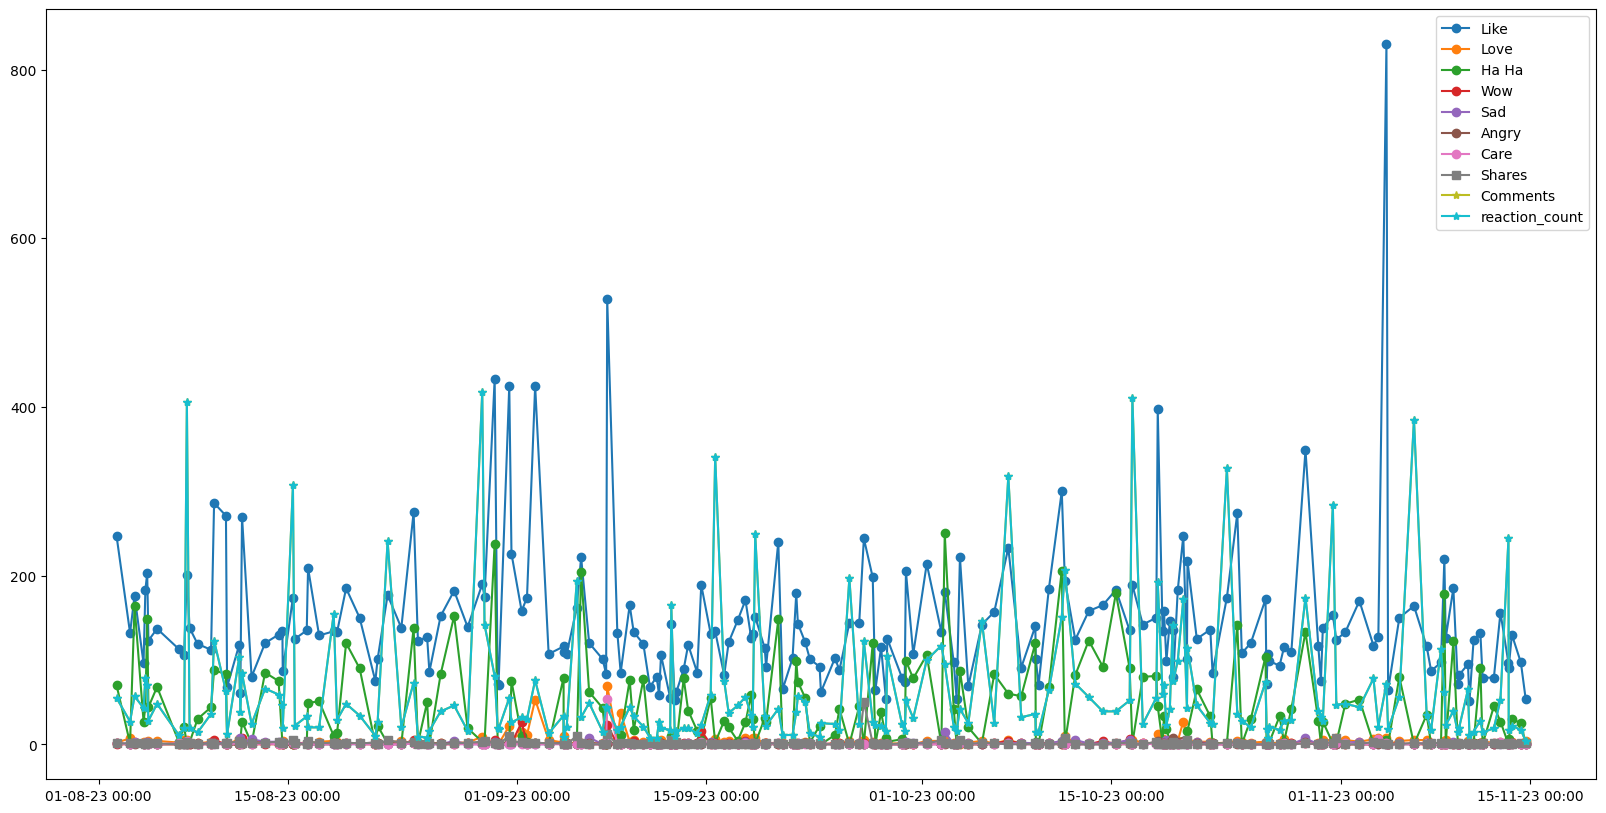

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
post_df_with_reactions['time'] = pd.to_datetime(post_df_with_reactions['time'])
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

3. Tổng từng loại reaction

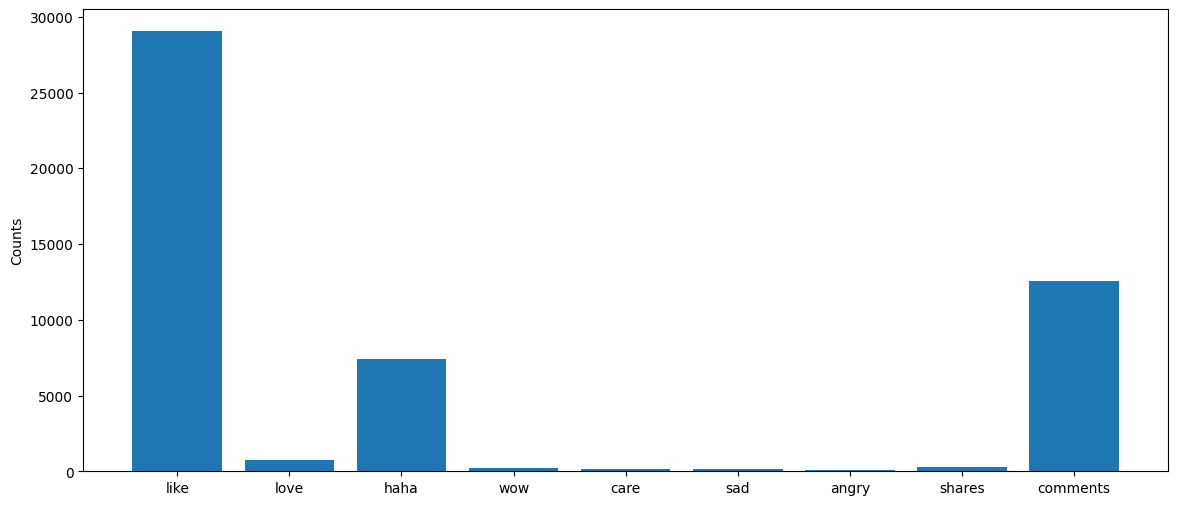

In [55]:
total_reactions = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

4. Tỉ lệ các loại reaction

In [56]:
# Tổng các cảm xúc có số lượng ít
df_reactions['total residual emotions'] = df_reactions['care'] + df_reactions['sad'] + df_reactions['angry'] +df_reactions['wow']

In [57]:
total_reactions = df_reactions[['like', 'love', 'haha', 'total residual emotions']].sum()

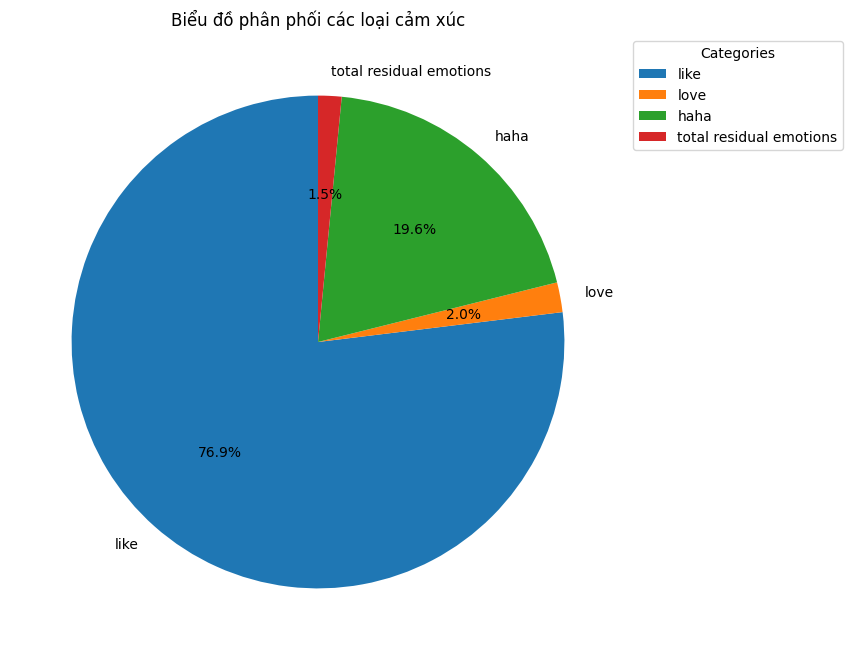

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(total_reactions.values, labels=total_reactions.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ phân phối các loại cảm xúc')
plt.legend(title="Categories", bbox_to_anchor=(1, 1))
plt.show()

5. Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết,..

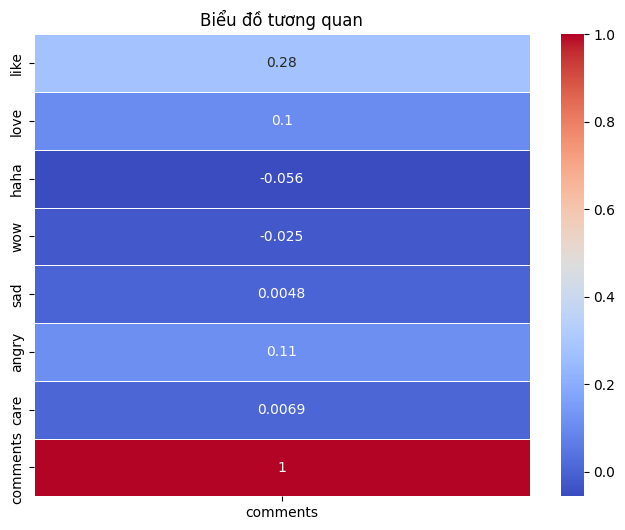

In [59]:
data_reations = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'comments']]

# Tính ma trận tương quan
data_for_corr = data_reations.corr()

# Lấy ma trận tương quan của 'comments' với các biến khác
correlation_with_comments = data_for_corr['comments'].to_frame()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Biểu đồ tương quan")
plt.show()

# Xử lí Reactors

In [60]:
def get_reactors(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [61]:
def createReactorsFrame(df):
    df_result = {'name' : [],
                 'link' : [],
                   'type' : [],}
    
    new_df = raw_df[~raw_df['reactors'].isna()]
    for index, rows in new_df.iterrows():
        x = rows['reactors']
        for reactor in get_reactors(x):
            try:
                df_result['name'].append(reactor['name'])
                df_result['link'].append(reactor['link'])
                df_result['type'].append(reactor['type'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [62]:
df_reactors = createReactorsFrame(raw_df)
df_reactors

,name,link,type
0,Thành Đạt,https://facebook.com/profile.php?id=1000953464...,like
1,Sáng Pvs,https://facebook.com/profile.php?id=1000952600...,like
2,Tatt Thgg,https://facebook.com/profile.php?id=1000940027...,like
3,Huynh Ngọc,https://facebook.com/profile.php?id=1000900083...,like
4,Nguyễn Phước,https://facebook.com/profile.php?id=1000897938...,like
...,...,...,...
10013,Nguyễn Thiên Phúc,https://facebook.com/profile.php?id=1000734772...,haha
10014,Trần Đăng,https://facebook.com/profile.php?id=1000734275...,like
10015,Ngọc Gemma,https://facebook.com/profile.php?id=1000930930...,like
10016,Vishal Singh,https://facebook.com/profile.php?id=1000919021...,like
